In [188]:
## IMport libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import read_csv
from numpy import percentile
import itertools
from matplotlib.backends.backend_pdf import PdfPages
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
from scipy import stats
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df=pd.read_csv('Combined_data_All_variable_clean_Hourly.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data=df.copy()

In [3]:
## Function for changing data type to numric
def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [4]:
NumericDtype(data)

In [5]:
data.isnull().sum()

FGO TK1551 Level Ctr PV - mm                             8723
FGO TK1552 Level Ctr PV - mm                             9084
FGO TK1553 Level Ctr PV - mm                             8737
FGO TK1554 Level Ctr PV - mm                             8723
FGO TK1555 Level Ctr PV - mm                             8775
TK1551 Air Blower Flow Loop PV - m3/h                    9542
TK1552 Air Blower Flow Loop PV - m3/h                    9521
TK1553 Air Blower Flow Loop PV - m3/h                    9527
TK1554 Air Blower Flow Loop PV - m3/h                    9527
TK1555 Air Blower Flow Loop PV - m3/h                    9528
FGO Mass Pull % PV - %                                  10448
TK1551 VELOCITY TO AIR CTRL PV - m3/hr                   9976
TK1552 VELOCITY TO AIR CTRL PV - mm/s                    9973
TK1553 VELOCITY TO AIR CTRL PV - mm/s                   10004
TK1554 VELOCITY TO AIR CTRL PV - mm/s                   10053
TK1555 VELOCITY TO AIR CTRL PV - mm/s                    9985
TK1551 F

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16760 entries, 2018-01-10 16:00:00 to 2019-12-09 23:00:00
Data columns (total 71 columns):
FGO TK1551 Level Ctr PV - mm                            8037 non-null float64
FGO TK1552 Level Ctr PV - mm                            7676 non-null float64
FGO TK1553 Level Ctr PV - mm                            8023 non-null float64
FGO TK1554 Level Ctr PV - mm                            8037 non-null float64
FGO TK1555 Level Ctr PV - mm                            7985 non-null float64
TK1551 Air Blower Flow Loop PV - m3/h                   7218 non-null float64
TK1552 Air Blower Flow Loop PV - m3/h                   7239 non-null float64
TK1553 Air Blower Flow Loop PV - m3/h                   7233 non-null float64
TK1554 Air Blower Flow Loop PV - m3/h                   7233 non-null float64
TK1555 Air Blower Flow Loop PV - m3/h                   7232 non-null float64
FGO Mass Pull % PV - %                                  6312 non-null float6

In [7]:
data.columns

Index(['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm', 'FGO TK1554 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm', 'TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h', 'FGO Mass Pull % PV - %',
       'TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1551 Froth Bubble Diameter - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm', 'pH Indication for FGO - PV -  pH',
       'FGO FLTS FD TNK DNSTY CONTROL MEAS -  %(PS)',
       'Collector Added To TK1550 PV -  m3/h',
       'FGO FLTS FD TNK WTR FLW CONTROL MEAS -  m3

In [8]:
X1=data[['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm', 'FGO TK1554 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm']]

In [9]:
y=data[['FGO Conc Flow Controller PV -  m3/hr']]

In [10]:
y.shape

(16760, 1)

In [11]:
import statsmodels.regression.linear_model as sm

In [12]:
result1 = sm.OLS(y,X1,missing='drop').fit()

In [13]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.813
Model:                                              OLS   Adj. R-squared (uncentered):              0.813
Method:                                   Least Squares   F-statistic:                              5937.
Date:                                  Mon, 20 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          18:07:00   Log-Likelihood:                         -49229.
No. Observations:                                  6827   AIC:                                  9.847e+04
Df Residuals:                                      6822   BIC:                                  9.850e+04
Df Model:                                             5                                                  
Covariance Type:                              nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
FGO TK1551 Level Ctr PV - mm    -0.0759      0.073     -1.046      0.296      -0.218       0.066
FGO TK1552 Level Ctr PV - mm     2.3924      0.095     25.107      0.000       2.206       2.579
FGO TK1553 Level Ctr PV - mm     0.6029      0.086      7.017      0.000       0.434       0.771
FGO TK1554 Level Ctr PV - mm     0.8508      0.084     10.100      0.000       0.686       1.016
FGO TK1555 Level Ctr PV - mm    -1.5621      0.072    -21.738      0.000      -1.703      -1.421
==============================================================================
Omnibus:                      188.056   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.861
Skew:                           0.130   Prob(JB):                     1.70e-23
Kurtosis:                       2.451   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X2=data[['TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h']]

In [15]:
result2 = sm.OLS(y,X2,missing='drop').fit()

In [16]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.882
Model:                                              OLS   Adj. R-squared (uncentered):              0.882
Method:                                   Least Squares   F-statistic:                          1.013e+04
Date:                                  Mon, 20 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          18:07:00   Log-Likelihood:                         -47169.
No. Observations:                                  6755   AIC:                                  9.435e+04
Df Residuals:                                      6750   BIC:                                  9.438e+04
Df Model:                                             5                                                  
Covariance Type:                              nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
TK1551 Air Blower Flow Loop PV - m3/h     0.5708      0.033     17.312      0.000       0.506       0.635
TK1552 Air Blower Flow Loop PV - m3/h    -0.0099      0.026     -0.379      0.705      -0.061       0.041
TK1553 Air Blower Flow Loop PV - m3/h     0.5539      0.037     14.953      0.000       0.481       0.627
TK1554 Air Blower Flow Loop PV - m3/h    -0.4884      0.034    -14.176      0.000      -0.556      -0.421
TK1555 Air Blower Flow Loop PV - m3/h     0.3515      0.029     12.287      0.000       0.295       0.408
==============================================================================
Omnibus:                       68.667   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.611
Skew:                          -0.187   Prob(JB):                     4.18e-14
Kurtosis:                       2.719   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X3=data[['TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s']]

In [18]:
result3 = sm.OLS(y,X3,missing='drop').fit()

In [19]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.921
Model:                                              OLS   Adj. R-squared (uncentered):              0.921
Method:                                   Least Squares   F-statistic:                          1.174e+04
Date:                                  Mon, 20 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          18:07:00   Log-Likelihood:                         -34311.
No. Observations:                                  5038   AIC:                                  6.863e+04
Df Residuals:                                      5033   BIC:                                  6.866e+04
Df Model:                                             5                                                  
Covariance Type:                              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
TK1551 VELOCITY TO AIR CTRL PV - m3/hr     1.6489      0.136     12.162      0.000       1.383       1.915
TK1552 VELOCITY TO AIR CTRL PV - mm/s      0.3939      0.172      2.287      0.022       0.056       0.732
TK1553 VELOCITY TO AIR CTRL PV - mm/s      2.3923      0.183     13.084      0.000       2.034       2.751
TK1554 VELOCITY TO AIR CTRL PV - mm/s      3.5247      0.248     14.216      0.000       3.039       4.011
TK1555 VELOCITY TO AIR CTRL PV - mm/s      2.2652      0.209     10.856      0.000       1.856       2.674
==============================================================================
Omnibus:                       32.620   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.876
Skew:                           0.119   Prob(JB):                     2.19e-09
Kurtosis:                       3.365   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X4=data[['TK1551 Froth Bubble Diameter - mm',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm']]

In [21]:
result4 = sm.OLS(y,X4,missing='drop').fit()

In [22]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.843
Model:                                              OLS   Adj. R-squared (uncentered):              0.843
Method:                                   Least Squares   F-statistic:                          1.008e+04
Date:                                  Mon, 20 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          18:07:00   Log-Likelihood:                         -40198.
No. Observations:                                  5640   AIC:                                  8.040e+04
Df Residuals:                                      5637   BIC:                                  8.042e+04
Df Model:                                             3                                                  
Covariance Type:                              nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
TK1551 Froth Bubble Diameter - mm    25.3133      1.146     22.087      0.000      23.067      27.560
TK1552 Froth Bubble Diameter - mm     9.5184      1.118      8.517      0.000       7.328      11.709
TK1553 Froth Bubble Diameter - mm     4.2554      1.129      3.770      0.000       2.042       6.468
==============================================================================
Omnibus:                      231.314   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.446
Skew:                           0.046   Prob(JB):                     1.54e-22
Kurtosis:                       2.353   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
a=print(result1.summary())
a.to_csv('Tank_Regression_Analysis.csv')
b=print(result2.summary())
b.to_csv('Air_Blower_Regression_Tanks.csv')
c=print(result3.summary())
c.to_csv('V2A_Regression_Tanks.csv')
d=print(result4.summary())
d.to_csv('FrothBD_Regression_Tanks.csv')

                                          OLS Regression Results                                         
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.813
Model:                                              OLS   Adj. R-squared (uncentered):              0.813
Method:                                   Least Squares   F-statistic:                              5937.
Date:                                  Mon, 20 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          18:07:00   Log-Likelihood:                         -49229.
No. Observations:                                  6827   AIC:                                  9.847e+04
Df Residuals:                                      6822   BIC:                                  9.850e+04
Df Model:                                             5                                                  
Covariance Type:                              

AttributeError: 'NoneType' object has no attribute 'to_csv'

# Tank 1 Optimization

In [85]:
X1=data[['FGO TK1551 Level Ctr PV - mm','TK1551 Air Blower Flow Loop PV - m3/h','TK1551 Froth Bubble Diameter - mm']]

In [86]:
y=data[['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']]

In [87]:
result5 = sm.OLS(y,X1,missing='drop').fit()

In [88]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     TK1551 VELOCITY TO AIR CTRL PV - m3/hr   R-squared (uncentered):                   0.898
Model:                                                OLS   Adj. R-squared (uncentered):              0.898
Method:                                     Least Squares   F-statistic:                          1.588e+04
Date:                                    Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                            15:08:05   Log-Likelihood:                         -26062.
No. Observations:                                    5427   AIC:                                  5.213e+04
Df Residuals:                                        5424   BIC:                                  5.215e+04
Df Model:                                               3                                                  
Covariance Type:                                nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
FGO TK1551 Level Ctr PV - mm              0.1206      0.006     20.596      0.000       0.109       0.132
TK1551 Air Blower Flow Loop PV - m3/h     0.0847      0.002     35.997      0.000       0.080       0.089
TK1551 Froth Bubble Diameter - mm         0.6024      0.093      6.449      0.000       0.419       0.786
==============================================================================
Omnibus:                       78.510   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.276
Skew:                          -0.280   Prob(JB):                     6.10e-18
Kurtosis:                       2.807   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
data['FGO TK1551 Level Ctr PV - mm']=0.1206*data['FGO TK1551 Level Ctr PV - mm']

In [107]:
data['TK1551 Air Blower Flow Loop PV - m3/h']=0.0847*data['TK1551 Air Blower Flow Loop PV - m3/h']

In [108]:
data['TK1551 Froth Bubble Diameter - mm']=0.6024*data['TK1551 Froth Bubble Diameter - mm']

In [109]:
data['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']=data['FGO TK1551 Level Ctr PV - mm']+data['TK1551 Air Blower Flow Loop PV - m3/h']+data['TK1551 Froth Bubble Diameter - mm']

In [113]:
data['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']

(16760,)

In [114]:
y1=data['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']

# Tank 2 Optimization

In [115]:
X2=data[['FGO TK1552 Level Ctr PV - mm','TK1552 Air Blower Flow Loop PV - m3/h','TK1552 Froth Bubble Diameter - mm']]

In [116]:
y=data[['TK1552 VELOCITY TO AIR CTRL PV - mm/s']]

In [117]:
result7 = sm.OLS(y,X2,missing='drop').fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     TK1552 VELOCITY TO AIR CTRL PV - mm/s   R-squared (uncentered):                   0.929
Model:                                               OLS   Adj. R-squared (uncentered):              0.929
Method:                                    Least Squares   F-statistic:                          2.232e+04
Date:                                   Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                           15:24:24   Log-Likelihood:                         -23856.
No. Observations:                                   5118   AIC:                                  4.772e+04
Df Residuals:                                       5115   BIC:                                  4.774e+04
Df Model:                                              3                                                  
Covariance Type:                               nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
FGO TK1552 Level Ctr PV - mm              0.0874      0.004     19.679      0.000       0.079       0.096
TK1552 Air Blower Flow Loop PV - m3/h     0.0634      0.002     34.071      0.000       0.060       0.067
TK1552 Froth Bubble Diameter - mm         1.4748      0.063     23.478      0.000       1.352       1.598
==============================================================================
Omnibus:                       95.491   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.466
Skew:                          -0.337   Prob(JB):                     1.53e-22
Kurtosis:                       3.127   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
data['FGO TK1552 Level Ctr PV - mm']=0.0874*data['FGO TK1552 Level Ctr PV - mm']

In [119]:
data['TK1552 Air Blower Flow Loop PV - m3/h']=0.0634*data['TK1552 Air Blower Flow Loop PV - m3/h']

In [120]:
data['TK1552 Froth Bubble Diameter - mm']=1.4784*data['TK1552 Froth Bubble Diameter - mm']

In [122]:
data['TK1552 VELOCITY TO AIR CTRL PV - mm/s']=data['FGO TK1552 Level Ctr PV - mm']+data['TK1552 Air Blower Flow Loop PV - m3/h']+data['TK1552 Froth Bubble Diameter - mm']

In [123]:
y2=data['TK1552 VELOCITY TO AIR CTRL PV - mm/s']

# Tank 3 optimization

In [124]:
X3=data[['FGO TK1553 Level Ctr PV - mm','TK1553 Air Blower Flow Loop PV - m3/h','TK1553 Froth Bubble Diameter - mm']]

In [125]:
y=data[['TK1553 VELOCITY TO AIR CTRL PV - mm/s']]

In [126]:
result8 = sm.OLS(y,X3,missing='drop').fit()
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     TK1553 VELOCITY TO AIR CTRL PV - mm/s   R-squared (uncentered):                   0.926
Model:                                               OLS   Adj. R-squared (uncentered):              0.926
Method:                                    Least Squares   F-statistic:                          2.257e+04
Date:                                   Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                           15:39:02   Log-Likelihood:                         -24636.
No. Observations:                                   5412   AIC:                                  4.928e+04
Df Residuals:                                       5409   BIC:                                  4.930e+04
Df Model:                                              3                                                  
Covariance Type:                               nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
FGO TK1553 Level Ctr PV - mm              0.0089      0.004      2.440      0.015       0.002       0.016
TK1553 Air Blower Flow Loop PV - m3/h     0.0943      0.002     54.419      0.000       0.091       0.098
TK1553 Froth Bubble Diameter - mm         0.4020      0.068      5.950      0.000       0.270       0.534
==============================================================================
Omnibus:                      169.101   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.253
Skew:                          -0.421   Prob(JB):                     1.32e-41
Kurtosis:                       3.354   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here also all the variables are statistically significant.

In [127]:
data['FGO TK1553 Level Ctr PV - mm']=0.0089*data['FGO TK1553 Level Ctr PV - mm']

In [128]:
data['TK1553 Air Blower Flow Loop PV - m3/h']=0.0943*data['TK1553 Air Blower Flow Loop PV - m3/h']

In [129]:
data['TK1553 Froth Bubble Diameter - mm']=0.4020*data['TK1553 Froth Bubble Diameter - mm']

In [130]:
data['TK1553 VELOCITY TO AIR CTRL PV - mm/s']=data['FGO TK1553 Level Ctr PV - mm']+data['TK1553 Air Blower Flow Loop PV - m3/h']+data['TK1553 Froth Bubble Diameter - mm']

In [131]:
y3=data['TK1553 VELOCITY TO AIR CTRL PV - mm/s']

# Tank 4 optimization

In [132]:
X4=data[['FGO TK1554 Level Ctr PV - mm','TK1554 Air Blower Flow Loop PV - m3/h']]

In [133]:
y=data[['TK1554 VELOCITY TO AIR CTRL PV - mm/s']]

In [134]:
result9 = sm.OLS(y,X4,missing='drop').fit()
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     TK1554 VELOCITY TO AIR CTRL PV - mm/s   R-squared (uncentered):                   0.889
Model:                                               OLS   Adj. R-squared (uncentered):              0.889
Method:                                    Least Squares   F-statistic:                          2.153e+04
Date:                                   Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                           15:45:43   Log-Likelihood:                         -23875.
No. Observations:                                   5374   AIC:                                  4.775e+04
Df Residuals:                                       5372   BIC:                                  4.777e+04
Df Model:                                              2                                                  
Covariance Type:                               nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
FGO TK1554 Level Ctr PV - mm              0.0360      0.004     10.093      0.000       0.029       0.043
TK1554 Air Blower Flow Loop PV - m3/h     0.0727      0.001     65.264      0.000       0.070       0.075
==============================================================================
Omnibus:                       80.904   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.129
Skew:                          -0.265   Prob(JB):                     1.08e-17
Kurtosis:                       2.739   Cond. No.                         9.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here also all the variables are statistically significant.

In [135]:
data['FGO TK1554 Level Ctr PV - mm']=0.0360*data['FGO TK1554 Level Ctr PV - mm']

In [136]:
data['TK1554 Air Blower Flow Loop PV - m3/h']=0.0727*data['TK1554 Air Blower Flow Loop PV - m3/h']

In [137]:
data['TK1554 VELOCITY TO AIR CTRL PV - mm/s']=data['FGO TK1554 Level Ctr PV - mm']+data['TK1554 Air Blower Flow Loop PV - m3/h']

In [138]:
y4=data['TK1554 VELOCITY TO AIR CTRL PV - mm/s']

# Tank 5 optimization

In [139]:
X5=data[['FGO TK1555 Level Ctr PV - mm','TK1555 Air Blower Flow Loop PV - m3/h']]

In [140]:
y=data[['TK1555 VELOCITY TO AIR CTRL PV - mm/s']]

In [141]:
result10 = sm.OLS(y,X5,missing='drop').fit()
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     TK1555 VELOCITY TO AIR CTRL PV - mm/s   R-squared (uncentered):                   0.891
Model:                                               OLS   Adj. R-squared (uncentered):              0.891
Method:                                    Least Squares   F-statistic:                          2.218e+04
Date:                                   Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                           15:47:22   Log-Likelihood:                         -23965.
No. Observations:                                   5406   AIC:                                  4.793e+04
Df Residuals:                                       5404   BIC:                                  4.795e+04
Df Model:                                              2                                                  
Covariance Type:                               nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
FGO TK1555 Level Ctr PV - mm              0.0362      0.003     11.193      0.000       0.030       0.043
TK1555 Air Blower Flow Loop PV - m3/h     0.0829      0.001    101.320      0.000       0.081       0.084
==============================================================================
Omnibus:                       40.172   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.630
Skew:                          -0.194   Prob(JB):                     9.12e-10
Kurtosis:                       3.184   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here also all the variables are significant.

In [142]:
data['FGO TK1555 Level Ctr PV - mm']=0.0362*data['FGO TK1555 Level Ctr PV - mm']

In [143]:
data['TK1555 Air Blower Flow Loop PV - m3/h']=0.0829*data['TK1555 Air Blower Flow Loop PV - m3/h']

In [144]:
data['TK1555 VELOCITY TO AIR CTRL PV - mm/s']=data['FGO TK1555 Level Ctr PV - mm']+data['TK1555 Air Blower Flow Loop PV - m3/h']

In [145]:
y5=data['TK1555 VELOCITY TO AIR CTRL PV - mm/s']

In [163]:
final_dataset = pd.concat([y1,y2,y3,y4,y5,data['FGO Conc Flow Controller PV -  m3/hr']], ignore_index=False, axis=1)

In [166]:
final_dataset.columns

Index(['TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'FGO Conc Flow Controller PV -  m3/hr'],
      dtype='object')

In [165]:
final_dataset.isnull().sum()

TK1551 VELOCITY TO AIR CTRL PV - m3/hr    10823
TK1552 VELOCITY TO AIR CTRL PV - mm/s     11092
TK1553 VELOCITY TO AIR CTRL PV - mm/s     10827
TK1554 VELOCITY TO AIR CTRL PV - mm/s      9527
TK1555 VELOCITY TO AIR CTRL PV - mm/s      9580
FGO Conc Flow Controller PV -  m3/hr       9512
dtype: int64

In [167]:
X_final=final_dataset[['TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s']]

In [169]:
y_response=final_dataset[['FGO Conc Flow Controller PV -  m3/hr']]

In [219]:
results = sm.OLS(y_response,X_final,missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.877
Model:                                              OLS   Adj. R-squared (uncentered):              0.876
Method:                                   Least Squares   F-statistic:                              7228.
Date:                                  Wed, 22 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:36:06   Log-Likelihood:                         -35725.
No. Observations:                                  5096   AIC:                                  7.146e+04
Df Residuals:                                      5091   BIC:                                  7.149e+04
Df Model:                                             5                                                  
Covariance Type:                              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
TK1551 VELOCITY TO AIR CTRL PV - m3/hr     2.4895      0.340      7.321      0.000       1.823       3.156
TK1552 VELOCITY TO AIR CTRL PV - mm/s      0.8247      0.355      2.325      0.020       0.129       1.520
TK1553 VELOCITY TO AIR CTRL PV - mm/s      7.0269      0.461     15.243      0.000       6.123       7.931
TK1554 VELOCITY TO AIR CTRL PV - mm/s     -6.4843      0.555    -11.676      0.000      -7.573      -5.396
TK1555 VELOCITY TO AIR CTRL PV - mm/s      3.9953      0.428      9.340      0.000       3.157       4.834
==============================================================================
Omnibus:                       74.307   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.861
Skew:                          -0.164   Prob(JB):                     7.41e-13
Kurtosis:                       2.605   Cond. No.                         31.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
final_dataset['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']=final_dataset['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']/2.4895
final_dataset['TK1553 VELOCITY TO AIR CTRL PV - mm/s']=final_dataset['TK1553 VELOCITY TO AIR CTRL PV - mm/s']/7.0269
final_dataset['TK1554 VELOCITY TO AIR CTRL PV - mm/s']=final_dataset['TK1554 VELOCITY TO AIR CTRL PV - mm/s']/(-6.4843)
final_dataset['TK1555 VELOCITY TO AIR CTRL PV - mm/s']=final_dataset['TK1555 VELOCITY TO AIR CTRL PV - mm/s']/3.9953
final_dataset['TK1552 VELOCITY TO AIR CTRL PV - mm/s']=final_dataset['TK1552 VELOCITY TO AIR CTRL PV - mm/s']/0.8247

In [191]:
final_dataset['predicted_equation']=(final_dataset['area']*final_dataset['TK1551 VELOCITY TO AIR CTRL PV - m3/hr'])+final_dataset['TK1553 VELOCITY TO AIR CTRL PV - mm/s']+final_dataset['TK1554 VELOCITY TO AIR CTRL PV - mm/s']+final_dataset['TK1555 VELOCITY TO AIR CTRL PV - mm/s']+final_dataset['TK1552 VELOCITY TO AIR CTRL PV - mm/s']

In [181]:
error=(final_dataset['FGO Conc Flow Controller PV -  m3/hr']-final_dataset['predicted_equation'])/final_dataset['FGO Conc Flow Controller PV -  m3/hr']

In [184]:
error*100

2018-01-10 16:00:00   NaN
2018-01-10 17:00:00   NaN
2018-01-10 18:00:00   NaN
2018-01-10 19:00:00   NaN
2018-01-10 20:00:00   NaN
2018-01-10 21:00:00   NaN
2018-01-10 22:00:00   NaN
2018-01-10 23:00:00   NaN
2018-01-11 00:00:00   NaN
2018-01-11 01:00:00   NaN
2018-01-11 02:00:00   NaN
2018-01-11 03:00:00   NaN
2018-01-11 04:00:00   NaN
2018-01-11 05:00:00   NaN
2018-01-11 06:00:00   NaN
2018-01-11 07:00:00   NaN
2018-01-11 08:00:00   NaN
2018-01-11 09:00:00   NaN
2018-01-11 10:00:00   NaN
2018-01-11 11:00:00   NaN
2018-01-11 12:00:00   NaN
2018-01-11 13:00:00   NaN
2018-01-11 14:00:00   NaN
2018-01-11 15:00:00   NaN
2018-01-11 16:00:00   NaN
2018-01-11 17:00:00   NaN
2018-01-11 18:00:00   NaN
2018-01-11 19:00:00   NaN
2018-01-11 20:00:00   NaN
2018-01-11 21:00:00   NaN
                       ..
2019-12-08 18:00:00   NaN
2019-12-08 19:00:00   NaN
2019-12-08 20:00:00   NaN
2019-12-08 21:00:00   NaN
2019-12-08 22:00:00   NaN
2019-12-08 23:00:00   NaN
2019-12-09 00:00:00   NaN
2019-12-09 0

In [185]:
final_dataset['Error']=error

In [186]:
final_dataset.to_csv('Linear_Optimization_Regression.csv')

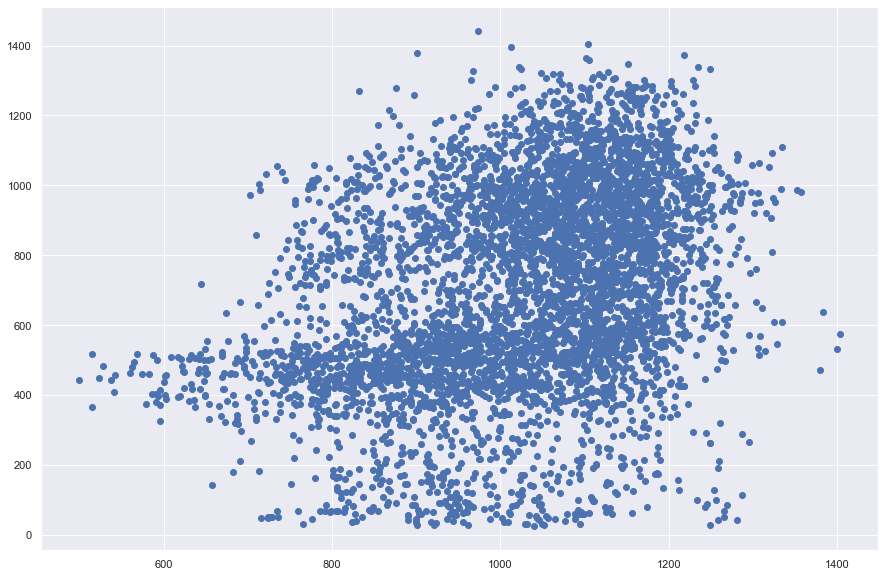

In [189]:
plt.scatter(final_dataset['predicted_equation'],final_dataset['FGO Conc Flow Controller PV -  m3/hr'])

In [193]:
final_dataset['area']=(final_dataset['FGO Conc Flow Controller PV -  m3/hr']/(final_dataset['velocity_sum']*3.6))

In [212]:
final_dataset['area'].describe()

count    5096.000000
mean        0.392199
std         0.154687
min         0.012138
25%         0.286987
50%         0.384824
75%         0.510413
max         0.848383
Name: area, dtype: float64

In [198]:
final_dataset['y1']=final_dataset['area']*final_dataset['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']*3.6

In [202]:
final_dataset['y1']=final_dataset['area']*final_dataset['TK1551 VELOCITY TO AIR CTRL PV - m3/hr']*3.6
final_dataset['y2']=final_dataset['area']*final_dataset['TK1552 VELOCITY TO AIR CTRL PV - mm/s']*3.6
final_dataset['y3']=final_dataset['area']*final_dataset['TK1553 VELOCITY TO AIR CTRL PV - mm/s']*3.6
final_dataset['y4']=final_dataset['area']*final_dataset['TK1554 VELOCITY TO AIR CTRL PV - mm/s']*3.6
final_dataset['y5']=final_dataset['area']*final_dataset['TK1555 VELOCITY TO AIR CTRL PV - mm/s']*3.6

In [203]:
final_dataset.columns

Index(['TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'FGO Conc Flow Controller PV -  m3/hr', 'predicted_equation', 'Error',
       'velocity_sum', 'area', 'y1', 'y2', 'y3', 'y4', 'y5'],
      dtype='object')

In [204]:
final_dataset['sum']=final_dataset['y1']+final_dataset['y2']+final_dataset['y3']+final_dataset['y4']+final_dataset['y5']

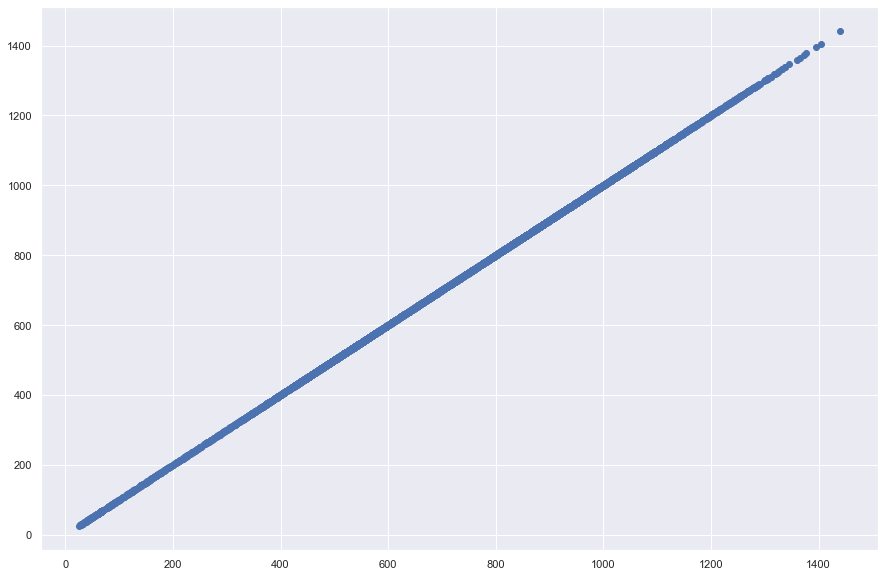

In [205]:
plt.scatter(final_dataset['sum'],final_dataset['FGO Conc Flow Controller PV -  m3/hr'])

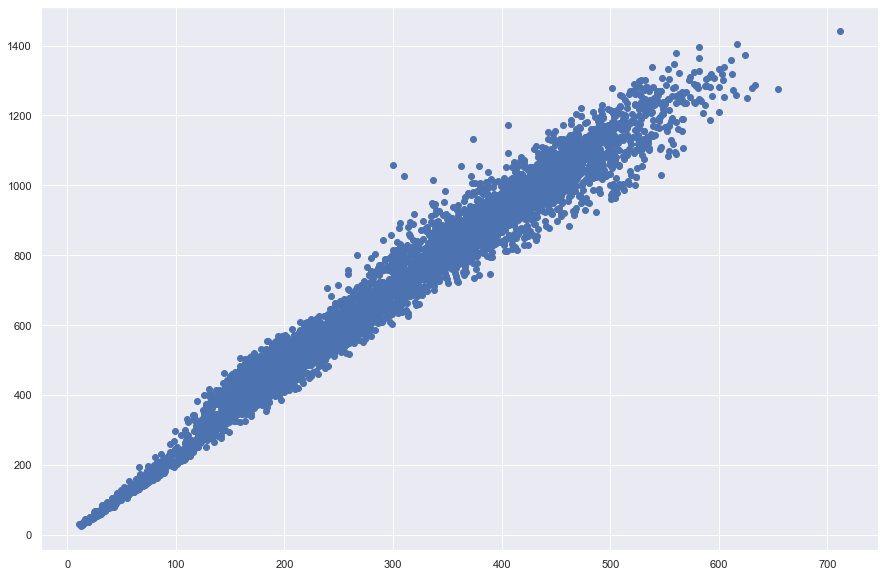

In [206]:
plt.scatter(final_dataset['y1'],final_dataset['FGO Conc Flow Controller PV -  m3/hr'])

In [214]:
(final_dataset['y1'].mean()/final_dataset['FGO Conc Flow Controller PV -  m3/hr'].mean())*100

43.21961119551299

In [215]:
(final_dataset['y2'].mean()/final_dataset['FGO Conc Flow Controller PV -  m3/hr'].mean())*100

18.456178633364434

In [216]:
(final_dataset['y3'].mean()/final_dataset['FGO Conc Flow Controller PV -  m3/hr'].mean())*100

16.225788338394395

In [217]:
(final_dataset['y4'].mean()/final_dataset['FGO Conc Flow Controller PV -  m3/hr'].mean())*100

11.49914335741435

In [218]:
(final_dataset['y5'].mean()/final_dataset['FGO Conc Flow Controller PV -  m3/hr'].mean())*100

11.468410776587149

# Total Optimization

In [51]:
total=data[['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm', 'FGO TK1554 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm', 'TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h',
       'TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm']]

In [52]:
result11 = sm.OLS(y,total,missing='drop').fit()
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.939
Model:                                              OLS   Adj. R-squared (uncentered):              0.938
Method:                                   Least Squares   F-statistic:                              4138.
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          13:58:40   Log-Likelihood:                         -30855.
No. Observations:                                  4615   AIC:                                  6.174e+04
Df Residuals:                                      4598   BIC:                                  6.185e+04
Df Model:                                            17                                                  
Covariance Type:                              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
FGO TK1551 Level Ctr PV - mm              -0.3083      0.068     -4.562      0.000      -0.441      -0.176
FGO TK1552 Level Ctr PV - mm              -0.2356      0.081     -2.920      0.004      -0.394      -0.077
FGO TK1553 Level Ctr PV - mm               0.6779      0.062     10.983      0.000       0.557       0.799
FGO TK1554 Level Ctr PV - mm              -0.1130      0.061     -1.844      0.065      -0.233       0.007
FGO TK1555 Level Ctr PV - mm              -0.6672      0.056    -11.823      0.000      -0.778      -0.557
TK1551 Air Blower Flow Loop PV - m3/h      0.5395      0.032     16.840      0.000       0.477       0.602
TK1552 Air Blower Flow Loop PV - m3/h     -0.3449      0.028    -12.369      0.000      -0.400      -0.290
TK1553 Air Blower Flow Loop PV - m3/h      0.4458      0.040     11.156      0.000       0.367       0.524
TK1554 Air Blower Flow Loop PV - m3/h     -0.4553      0.032    -14.039      0.000      -0.519      -0.392
TK1555 Air Blower Flow Loop PV - m3/h      0.3107      0.027     11.401      0.000       0.257       0.364
TK1551 VELOCITY TO AIR CTRL PV - m3/hr     1.6044      0.140     11.442      0.000       1.330       1.879
TK1552 VELOCITY TO AIR CTRL PV - mm/s      0.6368      0.194      3.279      0.001       0.256       1.018
TK1553 VELOCITY TO AIR CTRL PV - mm/s      1.1760      0.210      5.597      0.000       0.764       1.588
TK1554 VELOCITY TO AIR CTRL PV - mm/s      4.7016      0.248     18.965      0.000       4.216       5.188
TK1555 VELOCITY TO AIR CTRL PV - mm/s      0.6673      0.228      2.926      0.003       0.220       1.114
TK1552 Froth Bubble Diameter - mm         -3.1959      0.794     -4.026      0.000      -4.752      -1.640
TK1553 Froth Bubble Diameter - mm         -7.8354      0.910     -8.611      0.000      -9.619      -6.052
==============================================================================
Omnibus:                       37.942   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.942
Skew:                           0.127   Prob(JB):                     2.36e-11
Kurtosis:                       3.436   Cond. No.                         625.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
total_1=data[['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm', 'TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h',
       'TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm']]

In [54]:
result12 = sm.OLS(y,total_1,missing='drop').fit()
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.939
Model:                                              OLS   Adj. R-squared (uncentered):              0.938
Method:                                   Least Squares   F-statistic:                              4394.
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          13:59:40   Log-Likelihood:                         -30857.
No. Observations:                                  4615   AIC:                                  6.175e+04
Df Residuals:                                      4599   BIC:                                  6.185e+04
Df Model:                                            16                                                  
Covariance Type:                              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
FGO TK1551 Level Ctr PV - mm              -0.3169      0.067     -4.700      0.000      -0.449      -0.185
FGO TK1552 Level Ctr PV - mm              -0.2762      0.078     -3.558      0.000      -0.428      -0.124
FGO TK1553 Level Ctr PV - mm               0.6622      0.061     10.829      0.000       0.542       0.782
FGO TK1555 Level Ctr PV - mm              -0.6969      0.054    -12.885      0.000      -0.803      -0.591
TK1551 Air Blower Flow Loop PV - m3/h      0.5416      0.032     16.910      0.000       0.479       0.604
TK1552 Air Blower Flow Loop PV - m3/h     -0.3518      0.028    -12.726      0.000      -0.406      -0.298
TK1553 Air Blower Flow Loop PV - m3/h      0.4488      0.040     11.236      0.000       0.370       0.527
TK1554 Air Blower Flow Loop PV - m3/h     -0.4534      0.032    -13.985      0.000      -0.517      -0.390
TK1555 Air Blower Flow Loop PV - m3/h      0.3076      0.027     11.304      0.000       0.254       0.361
TK1551 VELOCITY TO AIR CTRL PV - m3/hr     1.6149      0.140     11.524      0.000       1.340       1.890
TK1552 VELOCITY TO AIR CTRL PV - mm/s      0.6382      0.194      3.285      0.001       0.257       1.019
TK1553 VELOCITY TO AIR CTRL PV - mm/s      1.1507      0.210      5.487      0.000       0.740       1.562
TK1554 VELOCITY TO AIR CTRL PV - mm/s      4.7394      0.247     19.178      0.000       4.255       5.224
TK1555 VELOCITY TO AIR CTRL PV - mm/s      0.6309      0.227      2.776      0.006       0.185       1.076
TK1552 Froth Bubble Diameter - mm         -3.3455      0.790     -4.235      0.000      -4.894      -1.797
TK1553 Froth Bubble Diameter - mm         -7.8205      0.910     -8.593      0.000      -9.605      -6.036
==============================================================================
Omnibus:                       39.131   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.213
Skew:                           0.132   Prob(JB):                     1.25e-11
Kurtosis:                       3.437   Cond. No.                         619.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Categorisation

# Level Indicator

In [55]:
lic=data[['FGO TK1551 Level Ctr PV - mm', 'FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm']]

In [57]:
result13 = sm.OLS(y,lic,missing='drop').fit()
result13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.810
Model:                                              OLS   Adj. R-squared (uncentered):              0.810
Method:                                   Least Squares   F-statistic:                              7287.
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:11:21   Log-Likelihood:                         -49280.
No. Observations:                                  6827   AIC:                                  9.857e+04
Df Residuals:                                      6823   BIC:                                  9.860e+04
Df Model:                                             4                                                  
Covariance Type:                              nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
FGO TK1551 Level Ctr PV - mm     0.0149      0.073      0.205      0.838      -0.127       0.157
FGO TK1552 Level Ctr PV - mm     2.8539      0.084     33.879      0.000       2.689       3.019
FGO TK1553 Level Ctr PV - mm     0.7227      0.086      8.431      0.000       0.555       0.891
FGO TK1555 Level Ctr PV - mm    -1.3797      0.070    -19.691      0.000      -1.517      -1.242
==============================================================================
Omnibus:                      160.421   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.140
Skew:                           0.174   Prob(JB):                     2.43e-23
Kurtosis:                       2.505   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lic_1=data[['FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm']]

In [59]:
result14 = sm.OLS(y,lic_1,missing='drop').fit()
result14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.810
Model:                                              OLS   Adj. R-squared (uncentered):              0.810
Method:                                   Least Squares   F-statistic:                              9718.
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:12:03   Log-Likelihood:                         -49280.
No. Observations:                                  6827   AIC:                                  9.857e+04
Df Residuals:                                      6824   BIC:                                  9.859e+04
Df Model:                                             3                                                  
Covariance Type:                              nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
FGO TK1552 Level Ctr PV - mm     2.8554      0.084     34.012      0.000       2.691       3.020
FGO TK1553 Level Ctr PV - mm     0.7253      0.085      8.561      0.000       0.559       0.891
FGO TK1555 Level Ctr PV - mm    -1.3726      0.061    -22.517      0.000      -1.492      -1.253
==============================================================================
Omnibus:                      163.391   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.692
Skew:                           0.175   Prob(JB):                     1.12e-23
Kurtosis:                       2.502   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Air Blower

In [60]:
aic=data[['TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1552 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h']]

In [61]:
result15 = sm.OLS(y,aic,missing='drop').fit()
result15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.882
Model:                                              OLS   Adj. R-squared (uncentered):              0.882
Method:                                   Least Squares   F-statistic:                          1.013e+04
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:13:30   Log-Likelihood:                         -47169.
No. Observations:                                  6755   AIC:                                  9.435e+04
Df Residuals:                                      6750   BIC:                                  9.438e+04
Df Model:                                             5                                                  
Covariance Type:                              nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
TK1551 Air Blower Flow Loop PV - m3/h     0.5708      0.033     17.312      0.000       0.506       0.635
TK1552 Air Blower Flow Loop PV - m3/h    -0.0099      0.026     -0.379      0.705      -0.061       0.041
TK1553 Air Blower Flow Loop PV - m3/h     0.5539      0.037     14.953      0.000       0.481       0.627
TK1554 Air Blower Flow Loop PV - m3/h    -0.4884      0.034    -14.176      0.000      -0.556      -0.421
TK1555 Air Blower Flow Loop PV - m3/h     0.3515      0.029     12.287      0.000       0.295       0.408
==============================================================================
Omnibus:                       68.667   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.611
Skew:                          -0.187   Prob(JB):                     4.18e-14
Kurtosis:                       2.719   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
aic_1=data[['TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h']]

In [65]:
result16 = sm.OLS(y,aic_1,missing='drop').fit()
result16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.882
Model:                                              OLS   Adj. R-squared (uncentered):              0.882
Method:                                   Least Squares   F-statistic:                          1.266e+04
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:14:16   Log-Likelihood:                         -47169.
No. Observations:                                  6755   AIC:                                  9.435e+04
Df Residuals:                                      6751   BIC:                                  9.437e+04
Df Model:                                             4                                                  
Covariance Type:                              nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
TK1551 Air Blower Flow Loop PV - m3/h     0.5673      0.032     17.922      0.000       0.505       0.629
TK1553 Air Blower Flow Loop PV - m3/h     0.5482      0.034     16.214      0.000       0.482       0.614
TK1554 Air Blower Flow Loop PV - m3/h    -0.4875      0.034    -14.182      0.000      -0.555      -0.420
TK1555 Air Blower Flow Loop PV - m3/h     0.3510      0.029     12.284      0.000       0.295       0.407
==============================================================================
Omnibus:                       67.294   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.728
Skew:                          -0.187   Prob(JB):                     6.50e-14
Kurtosis:                       2.725   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Velocity to Aircontrol

In [66]:
vac=data[['TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s']]

In [67]:
result17 = sm.OLS(y,vac,missing='drop').fit()
result17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.921
Model:                                              OLS   Adj. R-squared (uncentered):              0.921
Method:                                   Least Squares   F-statistic:                          1.174e+04
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:16:41   Log-Likelihood:                         -34311.
No. Observations:                                  5038   AIC:                                  6.863e+04
Df Residuals:                                      5033   BIC:                                  6.866e+04
Df Model:                                             5                                                  
Covariance Type:                              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
TK1551 VELOCITY TO AIR CTRL PV - m3/hr     1.6489      0.136     12.162      0.000       1.383       1.915
TK1552 VELOCITY TO AIR CTRL PV - mm/s      0.3939      0.172      2.287      0.022       0.056       0.732
TK1553 VELOCITY TO AIR CTRL PV - mm/s      2.3923      0.183     13.084      0.000       2.034       2.751
TK1554 VELOCITY TO AIR CTRL PV - mm/s      3.5247      0.248     14.216      0.000       3.039       4.011
TK1555 VELOCITY TO AIR CTRL PV - mm/s      2.2652      0.209     10.856      0.000       1.856       2.674
==============================================================================
Omnibus:                       32.620   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.876
Skew:                           0.119   Prob(JB):                     2.19e-09
Kurtosis:                       3.365   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Bubble Diameter

In [68]:
bud=data[['TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm']]

In [69]:
result18 = sm.OLS(y,bud,missing='drop').fit()
result18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.828
Model:                                              OLS   Adj. R-squared (uncentered):              0.828
Method:                                   Least Squares   F-statistic:                          1.372e+04
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:17:40   Log-Likelihood:                         -40733.
No. Observations:                                  5681   AIC:                                  8.147e+04
Df Residuals:                                      5679   BIC:                                  8.148e+04
Df Model:                                             2                                                  
Covariance Type:                              nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
TK1552 Froth Bubble Diameter - mm    23.1925      0.957     24.238      0.000      21.317      25.068
TK1553 Froth Bubble Diameter - mm    13.3595      1.093     12.226      0.000      11.217      15.502
==============================================================================
Omnibus:                       82.717   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.798
Skew:                          -0.047   Prob(JB):                     1.54e-11
Kurtosis:                       2.551   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
final=data[['FGO TK1552 Level Ctr PV - mm',
       'FGO TK1553 Level Ctr PV - mm',
       'FGO TK1555 Level Ctr PV - mm',
       'TK1551 Air Blower Flow Loop PV - m3/h',
       'TK1553 Air Blower Flow Loop PV - m3/h',
       'TK1554 Air Blower Flow Loop PV - m3/h',
       'TK1555 Air Blower Flow Loop PV - m3/h',
       'TK1551 VELOCITY TO AIR CTRL PV - m3/hr',
       'TK1552 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1553 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1554 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1555 VELOCITY TO AIR CTRL PV - mm/s',
       'TK1552 Froth Bubble Diameter - mm',
       'TK1553 Froth Bubble Diameter - mm']]

In [72]:
result19 = sm.OLS(y,final,missing='drop').fit()
result19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     FGO Conc Flow Controller PV -  m3/hr   R-squared (uncentered):                   0.936
Model:                                              OLS   Adj. R-squared (uncentered):              0.936
Method:                                   Least Squares   F-statistic:                              4809.
Date:                                  Tue, 21 Jan 2020   Prob (F-statistic):                        0.00
Time:                                          14:19:20   Log-Likelihood:                         -30952.
No. Observations:                                  4615   AIC:                                  6.193e+04
Df Residuals:                                      4601   BIC:                                  6.202e+04
Df Model:                                            14                                                  
Covariance Type:                              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
FGO TK1552 Level Ctr PV - mm              -0.1813      0.078     -2.331      0.020      -0.334      -0.029
FGO TK1553 Level Ctr PV - mm               0.6795      0.061     11.095      0.000       0.559       0.800
FGO TK1555 Level Ctr PV - mm              -0.7479      0.053    -14.224      0.000      -0.851      -0.645
TK1551 Air Blower Flow Loop PV - m3/h      0.4063      0.031     13.054      0.000       0.345       0.467
TK1553 Air Blower Flow Loop PV - m3/h      0.2387      0.037      6.493      0.000       0.167       0.311
TK1554 Air Blower Flow Loop PV - m3/h     -0.4099      0.032    -12.614      0.000      -0.474      -0.346
TK1555 Air Blower Flow Loop PV - m3/h      0.2549      0.027      9.415      0.000       0.202       0.308
TK1551 VELOCITY TO AIR CTRL PV - m3/hr     0.9806      0.134      7.308      0.000       0.718       1.244
TK1552 VELOCITY TO AIR CTRL PV - mm/s      0.8651      0.197      4.389      0.000       0.479       1.252
TK1553 VELOCITY TO AIR CTRL PV - mm/s      1.3017      0.214      6.092      0.000       0.883       1.721
TK1554 VELOCITY TO AIR CTRL PV - mm/s      4.3469      0.250     17.419      0.000       3.858       4.836
TK1555 VELOCITY TO AIR CTRL PV - mm/s      0.9227      0.228      4.039      0.000       0.475       1.371
TK1552 Froth Bubble Diameter - mm         -4.0601      0.803     -5.059      0.000      -5.633      -2.487
TK1553 Froth Bubble Diameter - mm         -7.2448      0.927     -7.817      0.000      -9.062      -5.428
==============================================================================
Omnibus:                       17.673   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.512
Skew:                           0.069   Prob(JB):                     2.13e-05
Kurtosis:                       3.305   Cond. No.                         560.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""